# **ITERATED GREEDY APPROACH**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Streaming output truncated to the last 5000 lines.
|    950    |    662    |    709    |
|     16    |     67    |    100    |
|    232    |     71    |     98    |
|    801    |    471    |     63    |
|    971    |    597    |     72    |
|    200    |     44    |    147    |
|    722    |    445    |    477    |
|    273    |    862    |    387    |
|    559    |    639    |    604    |
|    509    |    857    |    212    |
|    306    |    760    |    304    |
|     13    |    898    |    133    |
|    676    |    227    |    548    |
|    717    |     51    |    484    |
|    493    |    934    |    639    |
|     71    |     33    |    641    |
|    486    |    694    |    622    |
|    271    |    310    |    213    |
|    249    |    626    |    152    |
|    143    |    456    |    385    |
|    784    |    719    |     79    |
|    740    |    725    |    982    |
|    648    |    791    |    937    |
|    145    |    296    |    808    |
|    625    |    515    |     65    |

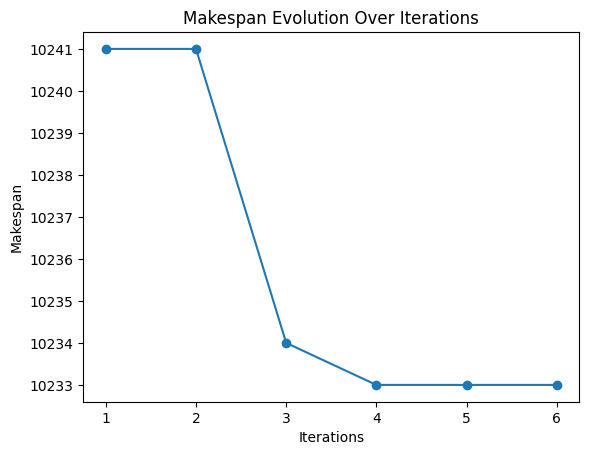

In [ ]:
import csv
import random
import matplotlib.pyplot as plt
from prettytable import PrettyTable

def read_csv(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append([int(cell) for cell in row])
    return data

def generate_initial_solution(num_jobs, num_machines):
    initial_solution = [[j for j in range(num_jobs)] for _ in range(num_machines)]
    for machine_schedule in initial_solution:
        random.shuffle(machine_schedule)
    return initial_solution

def calculate_makespan(solution, processing_times):
    num_jobs = len(solution[0])
    num_machines = len(solution)
    completion_times = [[0] * num_jobs for _ in range(num_machines)]

    for i in range(num_machines):
        for j in range(num_jobs):
            if i == 0 and j == 0:
                completion_times[i][j] = processing_times[solution[i][j]][i]
            elif i == 0:
                completion_times[i][j] = completion_times[i][j - 1] + processing_times[solution[i][j]][i]
            elif j == 0:
                completion_times[i][j] = completion_times[i - 1][j] + processing_times[solution[i][j]][i]
            else:
                completion_times[i][j] = max(completion_times[i - 1][j], completion_times[i][j - 1]) + processing_times[solution[i][j]][i]

    return completion_times[-1][-1]

def perturb_solution(solution):
    num_machines = len(solution)
    for i in range(num_machines):
        j1, j2 = random.sample(range(len(solution[i])), 2)
        solution[i][j1], solution[i][j2] = solution[i][j2], solution[i][j1]
    return solution

def iterated_greedy(num_jobs, num_machines, processing_times, max_iterations):
    makespan_history = []  # To store makespan values over iterations

    best_solution = generate_initial_solution(num_jobs, num_machines)
    best_makespan = calculate_makespan(best_solution, processing_times)
    makespan_history.append(best_makespan)

    print("Initial Solution:")
    print_table(best_solution)

    for iteration in range(1, max_iterations + 1):
        perturbed_solution = perturb_solution(best_solution)
        perturbed_makespan = calculate_makespan(perturbed_solution, processing_times)

        if perturbed_makespan < best_makespan:
            best_solution = perturbed_solution
            best_makespan = perturbed_makespan

        makespan_history.append(best_makespan)

        if iteration == 1 or iteration == (max_iterations + 1) // 2 or iteration == max_iterations:
            print(f"\nIteration {iteration} Solution:")
            print_table(best_solution)

    return best_solution, best_makespan, makespan_history

def print_table(data):
    table = PrettyTable()
    table.title = 'Machine Schedules'
    table.field_names = [f'Machine {i+1}' for i in range(len(data))]
    for row in zip(*data):  # Transpose the data to print it correctly
        table.add_row(row)
    print(table)

# Read job processing times from jobs.csv and machine processing times from machines.csv
jobs_processing_times = read_csv('/content/drive/MyDrive/Algo/jobs.csv')
machines_processing_times = read_csv('/content/drive/MyDrive/Algo/machines.csv')

# Ensure the dimensions match the expectations
expected_num_jobs = 1000
expected_num_machines = 3

if len(jobs_processing_times) != expected_num_jobs:
    print(f"Error: Expected {expected_num_jobs} jobs, but got {len(jobs_processing_times)} jobs.")
elif len(machines_processing_times) != expected_num_machines:
    print(f"Error: Expected {expected_num_machines} machines, but got {len(machines_processing_times)} machines.")
else:
    print("Data loaded successfully.")

    # Perform scheduling using Iterated Greedy algorithm
    num_jobs = len(jobs_processing_times[0])
    num_machines = len(machines_processing_times)
    max_iterations = 5  # Adjust the number of iterations as needed

    best_solution, best_makespan, makespan_history = iterated_greedy(
        expected_num_jobs, expected_num_machines, jobs_processing_times, max_iterations
    )

    # Print input and output tables
    print("\nFinal Jobs Processing Times (Input):")
    print_table(jobs_processing_times)
    print("\nFinal Best Solution (Output):")
    print_table(best_solution)

    print("\nBest Makespan:", best_makespan)

    # Plotting the makespan values over iterations
    plt.plot(range(1, max_iterations + 2), makespan_history, marker='o')
    plt.title('Makespan Evolution Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Makespan')
    plt.show()


# **GENETIC ANALYSIS**

Data loaded successfully.
Best Solution:
[[608 844 863 ... 763 735 832]
 [280 775  53 ... 684 533 719]
 [ 69  71 668 ... 484 806 159]]
Best Makespan: 10144


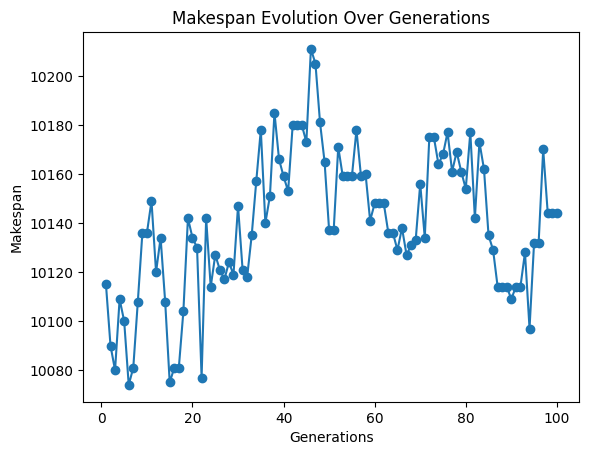

In [ ]:
import numpy as np
import random
import csv
import matplotlib.pyplot as plt

def read_csv(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append([int(cell) for cell in row])
    return data

def generate_initial_population(num_jobs, num_machines, population_size):
    population = []
    for _ in range(population_size):
        solution = np.zeros((num_machines, num_jobs), dtype=int)
        for i in range(num_machines):
            solution[i, :] = np.random.permutation(num_jobs)
        population.append(solution)
    return population

def calculate_makespan(individual, processing_times):
    num_machines, num_jobs = individual.shape
    completion_times = np.zeros((num_machines, num_jobs), dtype=int)

    for i in range(num_machines):
        for j in range(num_jobs):
            if i == 0 and j == 0:
                completion_times[i, j] = processing_times[i][individual[i, j]]
            elif i == 0:
                completion_times[i, j] = completion_times[i, j - 1] + processing_times[i][individual[i, j]]
            elif j == 0:
                completion_times[i, j] = completion_times[i - 1, j] + processing_times[i][individual[i, j]]
            else:
                completion_times[i, j] = max(completion_times[i - 1, j], completion_times[i, j - 1]) + processing_times[i][individual[i, j]]

    return completion_times[-1, -1]

def genetic_algorithm(num_jobs, num_machines, processing_times, population_size, num_generations, crossover_rate, mutation_rate):
    population = generate_initial_population(num_jobs, num_machines, population_size)

    makespan_history = []  # To store makespan values over generations

    for generation in range(num_generations):
        fitness_scores = [1 / calculate_makespan(individual, processing_times) for individual in population]

        parents = random.choices(population, weights=fitness_scores, k=population_size)

        offspring = []
        for parent1, parent2 in zip(parents[::2], parents[1::2]):
            if random.random() < crossover_rate:
                crossover_point = random.randint(1, num_jobs - 1)
                child1 = np.hstack((parent1[:, :crossover_point], parent2[:, crossover_point:]))
                child2 = np.hstack((parent2[:, :crossover_point], parent1[:, crossover_point:]))
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            if random.random() < mutation_rate:
                mutation_point = random.randint(0, num_jobs - 1)
                machine_idx = random.randint(0, num_machines - 1)
                child1[machine_idx, mutation_point] = random.sample(range(num_jobs), 1)[0]
            if random.random() < mutation_rate:
                mutation_point = random.randint(0, num_jobs - 1)
                machine_idx = random.randint(0, num_machines - 1)
                child2[machine_idx, mutation_point] = random.sample(range(num_jobs), 1)[0]

            offspring.extend([child1, child2])

        population = offspring

        # Find the best individual in the final population for this generation
        best_individual_generation = max(population, key=lambda x: 1 / calculate_makespan(x, processing_times))
        best_makespan_generation = calculate_makespan(best_individual_generation, processing_times)
        makespan_history.append(best_makespan_generation)

    best_individual = max(population, key=lambda x: 1 / calculate_makespan(x, processing_times))
    best_makespan = calculate_makespan(best_individual, processing_times)

    return best_individual, best_makespan, makespan_history

# Read job processing times from jobs.csv and machine processing times from machines.csv
jobs_processing_times = read_csv('/content/drive/MyDrive/Algo/jobs.csv')
machines_processing_times = read_csv('/content/drive/MyDrive/Algo/machines.csv')

# Ensure the dimensions match the expectations
expected_num_jobs = len(jobs_processing_times)
expected_num_machines = len(machines_processing_times)

if expected_num_jobs != 1000:
    print(f"Error: Expected 1000 jobs, but got {expected_num_jobs} jobs.")
elif expected_num_machines != 3:
    print(f"Error: Expected 3 machines, but got {expected_num_machines} machines.")
else:
    print("Data loaded successfully.")

    # Perform scheduling using Genetic Algorithm
    num_jobs = expected_num_jobs
    num_machines = expected_num_machines
    population_size = 50
    num_generations = 100
    crossover_rate = 0.8
    mutation_rate = 0.1

    best_solution, best_makespan, makespan_history = genetic_algorithm(
        num_jobs, num_machines, machines_processing_times,
        population_size, num_generations, crossover_rate, mutation_rate
    )

    # Print best solution and makespan
    print("Best Solution:")
    print(best_solution)
    print("Best Makespan:", best_makespan)

    # Plotting the makespan values over generations
    plt.plot(range(1, num_generations + 1), makespan_history, marker='o')
    plt.title('Makespan Evolution Over Generations')
    plt.xlabel('Generations')
    plt.ylabel('Makespan')
    plt.show()


# Comparing Results

Data loaded successfully.

Comparison Results Table:
+-------------------+------------------+---------------------------+-------------------+
|     Algorithm     | Average Makespan | Avg Query Processing Time |     Throughput    |
+-------------------+------------------+---------------------------+-------------------+
|  Iterated Greedy  |     10190.8      |    0.11509561538696289    | 8.688428283196547 |
| Genetic Algorithm |      10163       |     1.167561411857605     |  0.85648599709114 |
+-------------------+------------------+---------------------------+-------------------+


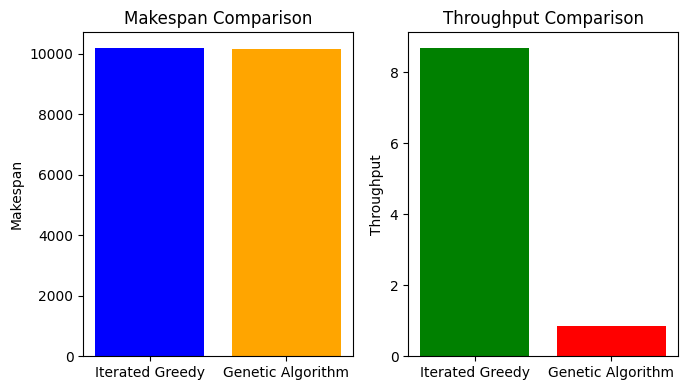

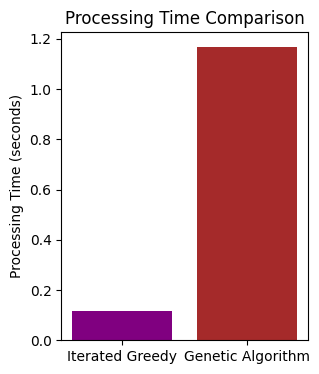

In [ ]:
import csv
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import time

def read_csv(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append([int(cell) for cell in row])
    return data

def generate_initial_solution(num_jobs, num_machines):
    initial_solution = [[j for j in range(num_jobs)] for _ in range(num_machines)]
    for machine_schedule in initial_solution:
        random.shuffle(machine_schedule)
    return initial_solution

def calculate_makespan(solution, processing_times):
    num_jobs = len(solution[0])
    num_machines = len(solution)
    completion_times = [[0] * num_jobs for _ in range(num_machines)]

    for i in range(num_machines):
        for j in range(num_jobs):
            if i == 0 and j == 0:
                completion_times[i][j] = processing_times[solution[i][j]][i]
            elif i == 0:
                completion_times[i][j] = completion_times[i][j - 1] + processing_times[solution[i][j]][i]
            elif j == 0:
                completion_times[i][j] = completion_times[i - 1][j] + processing_times[solution[i][j]][i]
            else:
                completion_times[i][j] = max(completion_times[i - 1][j], completion_times[i][j - 1]) + processing_times[solution[i][j]][i]

    return completion_times[-1][-1]

def perturb_solution(solution):
    num_machines = len(solution)
    for i in range(num_machines):
        j1, j2 = random.sample(range(len(solution[i])), 2)
        solution[i][j1], solution[i][j2] = solution[i][j2], solution[i][j1]
    return solution

def iterated_greedy(num_jobs, num_machines, processing_times, max_iterations):
    makespan_history = []

    best_solution = generate_initial_solution(num_jobs, num_machines)
    best_makespan = calculate_makespan(best_solution, processing_times)
    makespan_history.append(best_makespan)

    for iteration in range(1, max_iterations + 1):
        perturbed_solution = perturb_solution(best_solution)
        perturbed_makespan = calculate_makespan(perturbed_solution, processing_times)

        if perturbed_makespan < best_makespan:
            best_solution = perturbed_solution
            best_makespan = perturbed_makespan

        makespan_history.append(best_makespan)

    return best_solution, best_makespan, makespan_history

def print_table(data):
    table = PrettyTable()
    table.title = 'Machine Schedules'
    table.field_names = [f'Machine {i+1}' for i in range(len(data))]
    for row in zip(*data):
        table.add_row(row)
    print(table)

# Genetic Algorithm (using jobs_processing_times for consistency)
def generate_initial_population(num_jobs, num_machines, population_size):
    population = []
    for _ in range(population_size):
        solution = np.zeros((num_machines, num_jobs), dtype=int)
        for i in range(num_machines):
            solution[i, :] = np.random.permutation(num_jobs)
        population.append(solution)
    return population

def genetic_algorithm(num_jobs, num_machines, processing_times, population_size, num_generations, crossover_rate, mutation_rate):
    population = generate_initial_population(num_jobs, num_machines, population_size)

    for generation in range(num_generations):
        fitness_scores = [1 / calculate_makespan(individual, processing_times) for individual in population]
        parents = random.choices(population, weights=fitness_scores, k=population_size)

        offspring = []
        for parent1, parent2 in zip(parents[::2], parents[1::2]):
            if random.random() < crossover_rate:
                crossover_point = random.randint(1, num_jobs - 1)
                child1 = np.hstack((parent1[:, :crossover_point], parent2[:, crossover_point:]))
                child2 = np.hstack((parent2[:, :crossover_point], parent1[:, crossover_point:]))
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            if random.random() < mutation_rate:
                mutation_point = random.randint(0, num_jobs - 1)
                machine_idx = random.randint(0, num_machines - 1)
                child1[machine_idx, mutation_point] = random.sample(range(num_jobs), 1)[0]
            if random.random() < mutation_rate:
                mutation_point = random.randint(0, num_jobs - 1)
                machine_idx = random.randint(0, num_machines - 1)
                child2[machine_idx, mutation_point] = random.sample(range(num_jobs), 1)[0]

            offspring.extend([child1, child2])

        population = offspring

    best_individual = max(population, key=lambda x: 1 / calculate_makespan(x, processing_times))
    best_makespan = calculate_makespan(best_individual, processing_times)

    return best_individual, best_makespan

def measure_query_processing_time(algorithm_func, *args):
    start_time = time.time()
    algorithm_func(*args)
    return time.time() - start_time

def calculate_throughput(num_queries, total_execution_time):
    return num_queries / total_execution_time

def plot_comparison_graph(makespan_iterated_greedy, makespan_genetic_algorithm, throughput_iterated_greedy, throughput_genetic_algorithm):
    plt.figure(figsize=(7, 4))
    plt.subplot(1, 2, 1)
    plt.bar(['Iterated Greedy', 'Genetic Algorithm'], [makespan_iterated_greedy, makespan_genetic_algorithm], color=['blue', 'orange'], linewidth=0.8)
    plt.title('Makespan Comparison')
    plt.ylabel('Makespan')


    plt.subplot(1, 2, 2)
    plt.bar(['Iterated Greedy', 'Genetic Algorithm'], [throughput_iterated_greedy, throughput_genetic_algorithm], color=['green', 'red'], linewidth=0.8)
    plt.title('Throughput Comparison')
    plt.ylabel('Throughput')

    plt.tight_layout()
    plt.show()

def plot_processing_time_comparison(iterated_greedy_processing_time, genetic_algorithm_processing_time):
    plt.figure(figsize=(7, 4))
    plt.subplot(1, 2, 1)
    plt.bar(['Iterated Greedy', 'Genetic Algorithm'], [iterated_greedy_processing_time, genetic_algorithm_processing_time], color=['purple', 'brown'], linewidth=0.8)
    plt.title('Processing Time Comparison')
    plt.ylabel('Processing Time (seconds)')
    plt.show()

def compare_algorithms(iterated_greedy_func, genetic_algorithm_func, num_jobs, num_machines, jobs_processing_times, max_iterations, population_size, num_generations, crossover_rate, mutation_rate, num_queries=10):
    makespan_history_iterated_greedy = []
    query_processing_time_iterated_greedy = 0

    for _ in range(num_queries):
        _, _, makespan_history = iterated_greedy_func(num_jobs, num_machines, jobs_processing_times, max_iterations)
        makespan_history_iterated_greedy.append(makespan_history[-1])
        query_processing_time_iterated_greedy += measure_query_processing_time(iterated_greedy_func, num_jobs, num_machines, jobs_processing_times, max_iterations)

    best_solution_genetic, best_makespan_genetic = genetic_algorithm_func(num_jobs, num_machines, jobs_processing_times, population_size, num_generations, crossover_rate, mutation_rate)
    query_processing_time_genetic_algorithm = measure_query_processing_time(genetic_algorithm_func, num_jobs, num_machines, jobs_processing_times, population_size, num_generations, crossover_rate, mutation_rate)

    avg_makespan_iterated_greedy = np.mean(makespan_history_iterated_greedy)
    avg_makespan_genetic_algorithm = best_makespan_genetic

    avg_query_processing_time_iterated_greedy = query_processing_time_iterated_greedy / num_queries
    avg_query_processing_time_genetic_algorithm = query_processing_time_genetic_algorithm / num_queries

    throughput_iterated_greedy = calculate_throughput(num_queries, query_processing_time_iterated_greedy)
    throughput_genetic_algorithm = calculate_throughput(num_queries, query_processing_time_genetic_algorithm)

    table = PrettyTable()
    table.field_names = ["Algorithm", "Average Makespan", "Avg Query Processing Time", "Throughput"]
    table.add_row(["Iterated Greedy", avg_makespan_iterated_greedy, avg_query_processing_time_iterated_greedy, throughput_iterated_greedy])
    table.add_row(["Genetic Algorithm", avg_makespan_genetic_algorithm, avg_query_processing_time_genetic_algorithm, throughput_genetic_algorithm])
    print("\nComparison Results Table:")
    print(table)

    plot_comparison_graph(avg_makespan_iterated_greedy, avg_makespan_genetic_algorithm, throughput_iterated_greedy, throughput_genetic_algorithm)
    plot_processing_time_comparison(avg_query_processing_time_iterated_greedy, avg_query_processing_time_genetic_algorithm)

# Read job processing times from jobs.csv and machine processing times from machines.csv
jobs_processing_times = read_csv('/content/drive/MyDrive/Algo/jobs.csv')
machines_processing_times = read_csv('/content/drive/MyDrive/Algo/machines.csv')

# Ensure the dimensions match the expectations
expected_num_jobs = len(jobs_processing_times)
expected_num_machines = len(machines_processing_times)

if expected_num_jobs != 1000:
    print(f"Error: Expected 1000 jobs, but got {expected_num_jobs} jobs.")
elif expected_num_machines != 3:
    print(f"Error: Expected 3 machines, but got {expected_num_machines} machines.")
else:
    print("Data loaded successfully.")

    # Perform comparison
    compare_algorithms(
        iterated_greedy, genetic_algorithm,
        expected_num_jobs, expected_num_machines,
        jobs_processing_times, max_iterations=100, population_size=50, num_generations=100, crossover_rate=0.8, mutation_rate=0.1
    )


# Gantt Chart

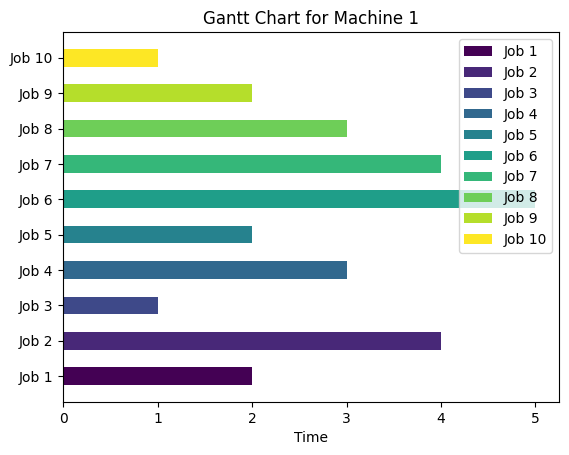

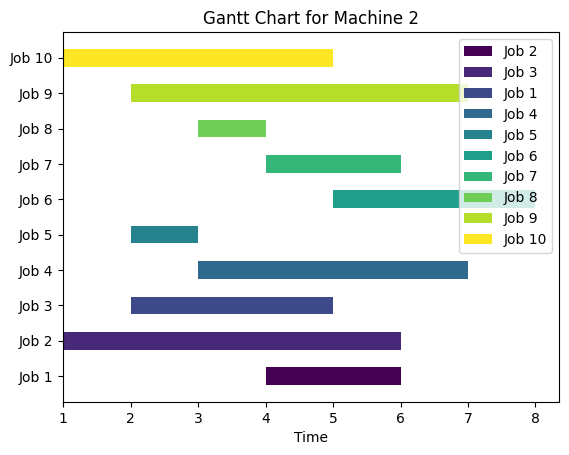

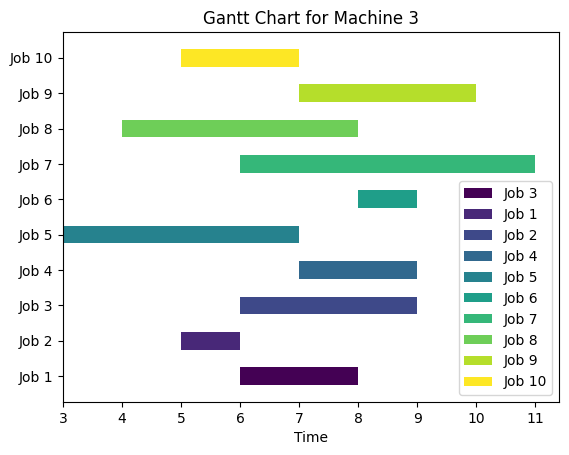

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def generate_individual_gantt_chart_for_machine(machine_index, solution, processing_times):
    num_machines = len(solution)
    num_jobs = len(solution[0])

    job_colors = plt.cm.viridis(np.linspace(0, 1, num_jobs))  # Colors for different jobs

    fig, ax = plt.subplots()

    for j in range(num_jobs):
        job_index = solution[machine_index][j]
        start_time = sum(processing_times[job_index][:machine_index])  # Cumulative processing time on previous machines
        duration = processing_times[job_index][machine_index]
        ax.barh(j, duration, left=start_time, height=0.5, color=job_colors[j], label=f'Job {job_index + 1}')

    ax.set_yticks(np.arange(num_jobs))
    ax.set_yticklabels([f'Job {j + 1}' for j in range(num_jobs)])
    ax.set_xlabel('Time')
    ax.set_title(f'Gantt Chart for Machine {machine_index + 1}')

    # Legend for jobs
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    plt.show()

# Example solution
example_solution = [
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],  # Machine 1's schedule
    [1, 2, 0, 3, 4, 5, 6, 7, 8, 9],  # Machine 2's schedule
    [2, 0, 1, 3, 4, 5, 6, 7, 8, 9]   # Machine 3's schedule
]

# Example processing times
jobs_processing_times = [
    [2, 3, 1],
    [4, 2, 3],
    [1, 5, 2],
    [3, 4, 2],
    [2, 1, 4],
    [5, 3, 1],
    [4, 2, 5],
    [3, 1, 4],
    [2, 5, 3],
    [1, 4, 2]
]

# Generate and display individual Gantt charts for each machine
for machine_index in range(len(example_solution)):
    generate_individual_gantt_chart_for_machine(machine_index, example_solution, jobs_processing_times)


In [ ]:
# Read job processing times from jobs.csv and machine processing times from machines.csv
jobs_processing_times = read_csv('jobs.csv')
machines_processing_times = read_csv('machines.csv')

# Print dimensions of loaded data for troubleshooting
print("Dimensions of jobs_processing_times:", len(jobs_processing_times), len(jobs_processing_times[0]))
print("Dimensions of machines_processing_times:", len(machines_processing_times), len(machines_processing_times[0]))

# Ensure the dimensions match the expectations
expected_num_jobs = len(jobs_processing_times)
expected_num_machines = len(machines_processing_times[0])

if len(jobs_processing_times) != expected_num_jobs:
    print(f"Error: Expected {expected_num_jobs} jobs, but got {len(jobs_processing_times)} jobs.")
elif len(machines_processing_times[0]) != expected_num_machines:
    print(f"Error: Expected {expected_num_machines} machines, but got {len(machines_processing_times[0])} machines.")
else:
    print("Data loaded successfully.")
    # Rest of the code remains unchanged.


NameError: ignored

In [ ]:
import csv

def read_csv(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append([int(cell) for cell in row])
    return data

# Read job processing times from jobs.csv and machine processing times from machines.csv
jobs_processing_times = read_csv('jobs.csv')
machines_processing_times = read_csv('machines.csv')

# Ensure the dimensions match the expectations
expected_num_jobs = 1000
expected_num_machines = 3

print(f"Dimensions of jobs_processing_times: {len(jobs_processing_times)} {len(jobs_processing_times[0])}")
print(f"Dimensions of machines_processing_times: {len(machines_processing_times)} {len(machines_processing_times[0])}")

if len(jobs_processing_times) != expected_num_jobs or len(jobs_processing_times[0]) != expected_num_machines:
    print(f"Error: Invalid dimensions of jobs_processing_times. Expected {expected_num_jobs}x{expected_num_machines}.")
elif len(machines_processing_times) != expected_num_machines or len(machines_processing_times[0]) != expected_num_jobs:
    print(f"Error: Invalid dimensions of machines_processing_times. Expected {expected_num_machines}x{expected_num_jobs}.")
else:
    print("Data loaded successfully.")
    # Rest of your code for genetic algorithm and processing


In [ ]:
 pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


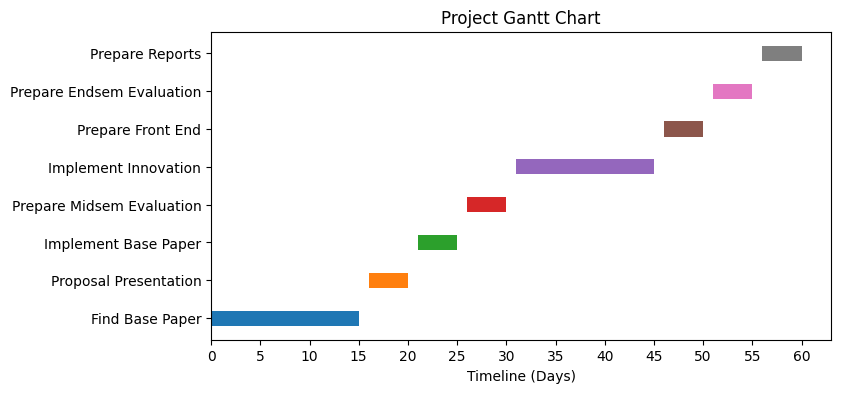

In [ ]:
import matplotlib.pyplot as plt

# Define the project tasks and schedule
tasks = [
    {"Task": "Find Base Paper", "Start": 0, "Finish": 15},
    {"Task": "Proposal Presentation", "Start": 16, "Finish": 20},
    {"Task": "Implement Base Paper", "Start": 21, "Finish": 25},
    {"Task": "Prepare Midsem Evaluation", "Start": 26, "Finish": 30},
    {"Task": "Implement Innovation", "Start": 31, "Finish": 45},
    {"Task": "Prepare Front End", "Start": 46, "Finish": 50},
    {"Task": "Prepare Endsem Evaluation", "Start": 51, "Finish": 55},
    {"Task": "Prepare Reports", "Start": 56, "Finish": 60},
]

# Create Gantt chart
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the parameters (8, 4) for the desired width and height

for i, task in enumerate(tasks):
    ax.barh(i, width=(task["Finish"] - task["Start"]), left=task["Start"], height=0.4, label=task["Task"])

# Customize the chart
ax.set_yticks(range(len(tasks)))
ax.set_yticklabels([task["Task"] for task in tasks])
ax.set_xlabel('Timeline (Days)')

# Set x-axis ticks to start from 0 to 60 with intervals of 5
ax.set_xticks(range(0, 61, 5))

ax.set_title('Project Gantt Chart')

# Save the Gantt chart as a PNG image
plt.savefig("project_gantt_chart_matplotlib.png", bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import csv

def generate_processing_times(num_jobs, num_machines):
    return np.random.randint(1, 100, size=(num_machines, num_jobs))

def save_to_csv(data, file_path):
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)

# Define dimensions
num_jobs = 10000
num_machines = 10

# Generate processing times for jobs and machines
jobs_processing_times = generate_processing_times(num_jobs, num_machines)
machines_processing_times = generate_processing_times(num_machines, num_jobs)

# Save to CSV files
save_to_csv(jobs_processing_times.T, 'jobs.csv')  # Transpose to match your desired format
save_to_csv(machines_processing_times, 'machines.csv')

print("Datasets generated and saved successfully.")
